<a href="https://colab.research.google.com/github/seiji0203/Machine-Learning-Models/blob/master/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

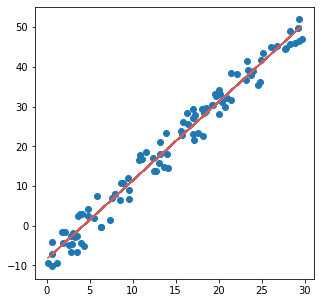

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ランダムな値を生成
seed = np.random.RandomState(0)
x = 30*seed.rand(100)
y = x*2 - 14 + 10*seed.rand(100)

# 関数を作成
def LinearRegression(x, y):
  a_nume = np.dot(x, y) - x.sum() * y.sum() / len(x)
  a_denom = (x**2).sum() - x.sum()**2/len(x)
  a = a_nume/ a_denom
  b = (y.sum() - a * x.sum()) / len(x)
  return a, b

a, b = LinearRegression(x, y)

y_ = a*x + b

# 可視化
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, y_, c='indianred')
plt.show()

# Boston data sets

In [2]:
# 必要なモジュールのimport
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Boston datasets import
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
# print(boston)　データを確認
# print(boston['DESCR']) DESCR変数の中身を確認

# feature_namesの中身を確認
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
# 説明変数の中身の確認
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [6]:
# 目的変数の中身の確認
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

# データフレームの作成

In [7]:
# 説明変数をDataFrameへ変換
df = DataFrame(data=boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


* 13の数値/カテゴリーの予測値です。中央値（属性14）が通常ターゲットとなる。
* CRIM 町ごとの一人当たりの犯罪率
* ZN 25,000平方フィート以上の土地に指定されている住宅地の割合
* INDUS 町ごとの非小売業の面積の割合
* CHAS チャールズ川ダミー変数（＝川に面している場合は1、そうでない場合は0）
* NOX 一酸化窒素濃度（1,000万分の1）
* RM 住戸あたりの平均部屋数
* AGE 1940年以前に建てられた持ち家の割合
* DIS ボストンの5つの雇用中心地までの加重距離
* RAD 放射状高速道路へのアクセス性を示す指標
* TAX 10,000ドルあたりの固定資産税の全額負担率
* PTRATIO 町ごとの生徒と教師の比率
* B 1000(Bk - 0.63)^2 ここで、Bkは町別の黒人の割合である。
* LSTAT 人口の%低いステータス
* MEDV 1000ドル台の持ち家の中央値

* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per $10,000

* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in $1000’s

In [8]:
# データの次元
df.shape

(506, 13)

In [9]:
# 目的変数をDataFrameへ追加
df['MEDV'] = np.array(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.shape

(506, 14)

In [11]:
# boston datasets data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# データの可視化
住宅価格を予測するために必要な変数を絞るためにヒートマップと散布図を確認

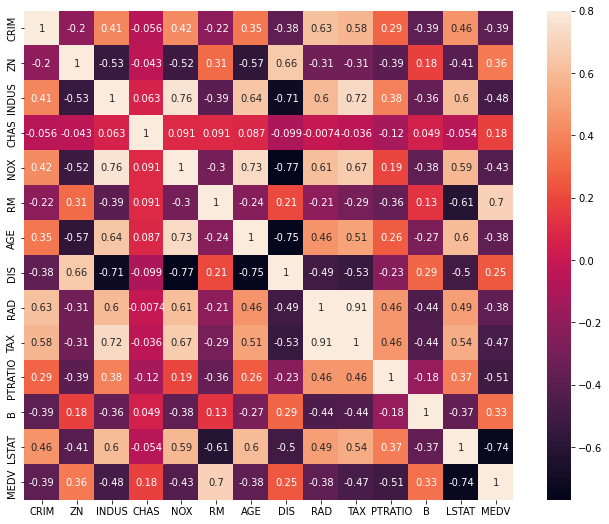

In [12]:
# ヒートマップを作成
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)
plt.show()

特徴量変数間の相関を確認することで多重共線性の確認もできます。

In [13]:
# データの可視化
# sns.pairplot(df, hue = "RM", diag_kind = "hist")
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


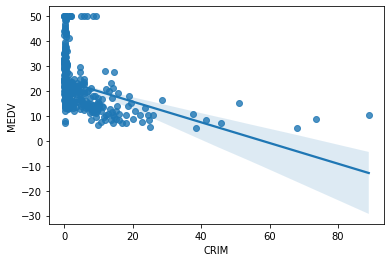

In [14]:
sns.regplot("CRIM", "MEDV", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


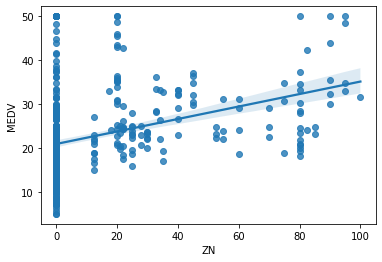

In [15]:
sns.regplot("ZN", "MEDV", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


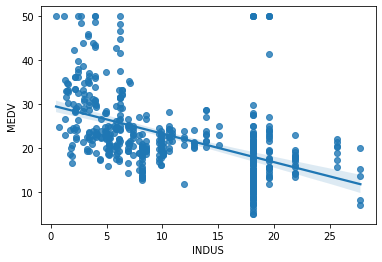

In [16]:
sns.regplot("INDUS", "MEDV", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


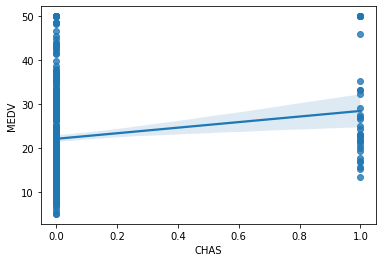

In [17]:
sns.regplot("CHAS", "MEDV", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


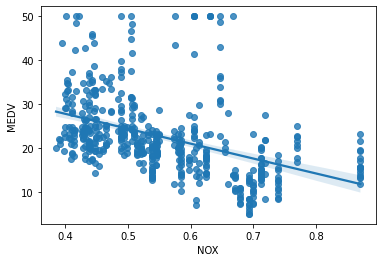

In [18]:
sns.regplot("NOX", "MEDV", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


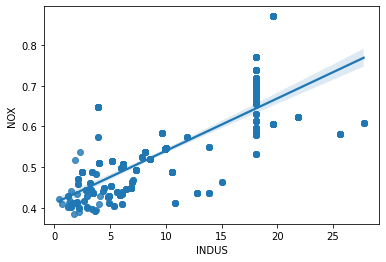

In [19]:
sns.regplot("INDUS", "NOX", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


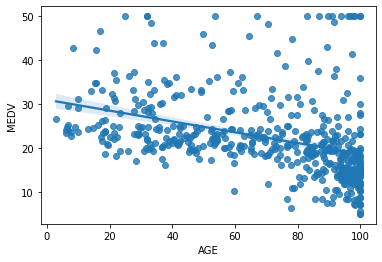

In [20]:
sns.regplot("AGE", "MEDV", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


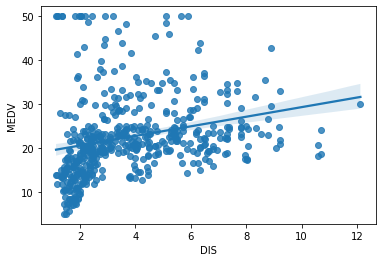

In [21]:
sns.regplot("DIS", "MEDV", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


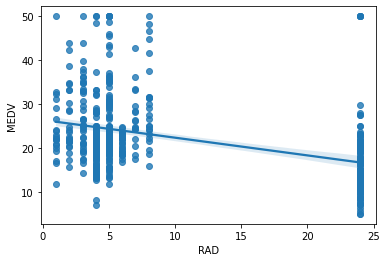

In [22]:
sns.regplot("RAD", "MEDV", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


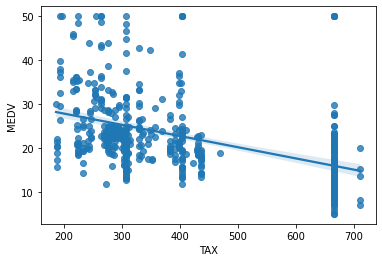

In [23]:
sns.regplot("TAX", "MEDV", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


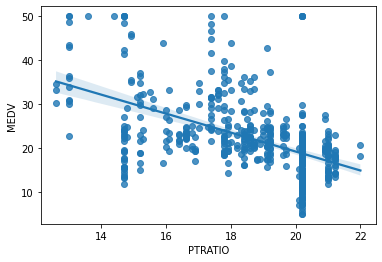

In [24]:
sns.regplot("PTRATIO", "MEDV", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


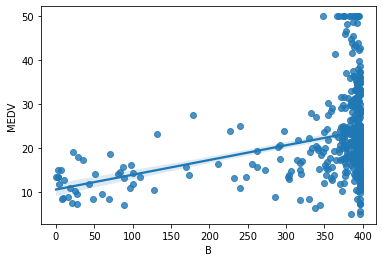

In [25]:
sns.regplot("B", "MEDV", data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


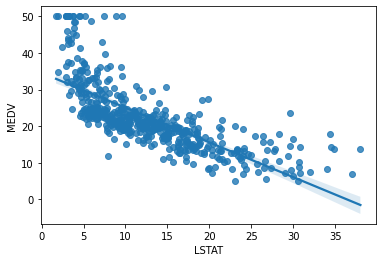

In [26]:
sns.regplot("LSTAT", "MEDV", data = df)

【考察】
* CRIM -0.39(犯罪率)と負の相関があり、犯罪率が増えると価格は安くなることも予測できる
* ZN 0.36と正の相関があり、敷地面積の割合が高いほど価格が向上する傾向がある
* INDUS −0.48と負の相関があり、小売業（商業施設やスーパー、ドラッグストアなど）があるほど家賃は高い傾向にあり、非小売業（工場やオフィスビルなど、、、区別できないことにより都会か田舎かの判断ができないので価格にブレがある）が多くなると価格の中央値は下がる傾向にある
* CHAS 0:川に面していない　1:川に面している　関係はなさそうなので説明変数から除外する
* NOX 工場に近いことでNOXが増加し、商業施設が相対的に少ないため、家賃の低下が観測できる
* INDUS + NOX 0.76と強い相関があることがわかる。よって非小売業者の70%以上は工場や廃棄物処理場などの燃焼を行う場所の可能性が高まりまる。
* RM 0.7と正の相関が比較的強く、部屋数が増えることで価格は高くなることが予測できる
* AGE　古い物件ほど家賃は安い（直感に反しているデータはおそらくリノベーションしている）
* DIS　通勤時間と関連性あり？（データが分散しているため除外）
* RAD　おそらく利便性の高さ？（扱いが難しいので除外）
* TAX　直感的に理解できないデータのため除外
* PTRATIO　生徒が少ないほど住宅価格は減少、つまり過疎化が進んでいる地域は低価格
* B　時代背景が不明なので邪推したくないため除外
* LSTAT 労働者階級が低いあるいは人的地位が低い人が多い土地ほど住宅価格の中央値が減少の傾向にある

# 線形単回帰分析

In [27]:
# カラムを指定してデータを表示
df[['RM']].head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [28]:
# 説明変数
data = df.loc[:, ['RM']].values
# データのリストを表示
data[0:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [29]:
# 目的変数
target = df.loc[:, 'MEDV'].values
target[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [30]:
# オブジェクト生成
model = LinearRegression()
model.get_params()
model = LinearRegression(fit_intercept = True, # False に設定すると切片を求める計算を含めない。目的変数が原点を必ず通る性質のデータを扱うときに利用。 (デフォルト値: True)
                         normalize = False, # True に設定すると、説明変数を事前に正規化する。 (デフォルト値: False)
                         copy_X = True, # メモリ内でデータを複製してから実行するかどうか。 (デフォルト値: True)
                         n_jobs = 1) # 計算に使うジョブの数。-1 に設定すると、すべての CPU を使って計算する。 (デフォルト値: 1)

In [31]:
model.fit(data, target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(n_jobs=1, normalize=False)

In [32]:
# 部屋数が1つの時
model.predict([[1]])

array([-25.5685118])

In [33]:
# 予測 部屋数が7つのときの値段
model.predict([[7]])

array([29.04414209])

In [34]:
# 単回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片 : -34.671


# 重回帰分析（2変数）

In [35]:
# カラムを指定してデータを表示
df[['CRIM', 'RM']].head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [36]:
# 説明変数
data2 = df.loc[:, ['CRIM', 'RM']].values
data2[0:5]

array([[6.320e-03, 6.575e+00],
       [2.731e-02, 6.421e+00],
       [2.729e-02, 7.185e+00],
       [3.237e-02, 6.998e+00],
       [6.905e-02, 7.147e+00]])

In [37]:
# 目的変数
target2 = df.loc[:, 'MEDV'].values
target2[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [38]:
# オブジェクト生成
model2 = LinearRegression()

In [39]:
# fit関数でパラメータ推定
model2.fit(data2, target2)

LinearRegression()

In [40]:
# 犯罪率0.2と部屋数7の場合は家賃29万円くらい（単回帰分析とあまり変わらないですね）
model2.predict([[0.2, 7]])

array([29.43977562])

In [41]:
# 犯罪率0.001と部屋数9の場合は家賃46万円くらい
model2.predict([[0.001, 9]])

array([46.27462985])

In [42]:
# 重回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片 : -34.671


# 重回帰分析 （7変数）

In [43]:
df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT']].head()

,CRIM,ZN,INDUS,NOX,RM,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,15.3,4.98
1,0.02731,0.0,7.07,0.469,6.421,17.8,9.14
2,0.02729,0.0,7.07,0.469,7.185,17.8,4.03
3,0.03237,0.0,2.18,0.458,6.998,18.7,2.94
4,0.06905,0.0,2.18,0.458,7.147,18.7,5.33


In [44]:
data3 = df.loc[:,['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT']].values
target3 = df.loc[:, ['MEDV']]

In [45]:
model3 = LinearRegression().fit(data3, target3)

In [46]:
# (部屋数6)の固定で他の変数の効果を調べる
model3.predict([[0.02, 18, 6, 0.5, 6, 18, 9]])

array([[23.66201431]])

In [47]:
# 最も安い部屋（部屋数6）：正の相関が強い変数は0.8倍、負の相関が強い変数は1.2倍
model3.predict([[0.024, 14.4, 7.2, 0.6, 6, 21.6, 10.8]])

array([[18.88978441]])

In [48]:
# 最も高い部屋（部屋数6）：正の相関が強い変数は1.2倍、負の相関が強い変数は0.8倍
model3.predict([[0.016, 21.6, 4.8, 0.4, 6, 14.4, 7.2]])

array([[28.43424421]])

# モデルの検証

In [49]:
print('単回帰決定係数: %.3f' % model.score(data, target))

単回帰決定係数: 0.484


In [50]:
print('重回帰決定係数（変数2）: %.3f' % model2.score(data2, target2))

重回帰決定係数（変数2）: 0.542


In [51]:
print('重回帰決定係数（変数7）: %.3f' %model3.score(data3, target3))

重回帰決定係数（変数7）: 0.683


In [52]:
# 70%を学習用、30%を検証用データに分割
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 42)

# 学習用データでパラメータ推定
model2.fit(X_train, y_train)

LinearRegression()

In [53]:
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

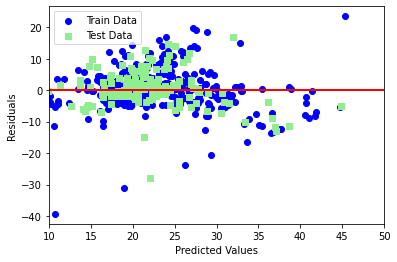

In [54]:
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10, 50])
plt.show()

In [55]:
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (model2.score(X_train, y_train), model2.score(X_test, y_test)))

MSE Train : 45.013, Test : 40.351
R^2 Train : 0.488, Test : 0.458


# Ridge回帰分析（L2ノルム）

In [56]:
# Ridge回帰のオブジェクト生成
ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.4878748108596338
0.45846542927972855


In [57]:
pred_train_R = ridge.predict(X_train)
pred_test_R = ridge.predict(X_test)

In [58]:
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, pred_train_R), mean_squared_error(y_test, pred_test_R)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (r2_score(y_train, pred_train_R), r2_score(y_test, pred_test_R)))

MSE Train : 45.014, Test : 40.351
R^2 Train : 0.488, Test : 0.458


In [59]:
# Ridgeのalphaを10倍にしてみる
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train))

0.48657395706872597


In [60]:
# Ridgeのalphaを0.1倍にしてみる
ridge01 = Ridge(alpha = .1).fit(X_train, y_train)
print(ridge01.score(X_train, y_train))

0.4878891391533069


# Lasso回帰分析（L1ノルム）

In [61]:
# 入力変数の正規化
lasso = Lasso().fit(X_train, y_train)

In [62]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.46583240048059327
0.4366353458334702


In [63]:
pred_train_L = lasso.predict(X_train)
pred_test_L = lasso.predict(X_test)

In [64]:
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, pred_train_L), mean_squared_error(y_test, pred_test_L)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (r2_score(y_train, pred_train_L), r2_score(y_test, pred_test_L)))

MSE Train : 46.951, Test : 41.978
R^2 Train : 0.466, Test : 0.437
